In [1]:
# import basics
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import time
import requests
import json
from IPython.display import Latex
from scipy import stats as st

# inport plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
from plotly.subplots import make_subplots

# make better view for tables
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import Image

# wide display
#pd.set_option('max_colwidth', 1000)

# change the window size
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set settings for display option
pd.set_option('display.max_columns', 500)

# import ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

### Table of content: 

<a href='#Описание проекта'>1. Project Description</a>

<a href='#Описание данных'>2. Data description</a>

<a href='#Цели и задачи проекта'>3. Objectives of the project</a>

<a href='#Чтение данных'>4. Reading the data</a>

- <a href='#Выводы: Чтение данных'>Conclusion: Reading the data</a>

<a href='#Анализ данных'>5. Data Analysis</a>

- <a href='#Выводы: Анализ данных'>Conclusion: Data Analysis</a>

<a href='#Модель прогнозирования оттока клиентов'>6. Customer churn forecasting model</a>

- <a href='#Выводы: Модель прогнозирования оттока клиентов'>Conclusion: customer churn forecasting model</a>

<a href='#Кластеризацию клиентов'>7. Client clusterization</a>

- <a href='#Выводы: Кластеризацию клиентов'>Conclusion: client clusterization</a>

<a href='#Выводы по проекту'>8. Conclusions of the project</a>

# 1. Project Description
<a id='Начало'></a>
<a id='Описание проекта'></a>

The network of fitness centers "Bodybuilder-Datascientist" develops a strategy of interaction with clients based on analytical data.

A common problem in fitness clubs and other services is customer churn. How to understand that the client is no longer with you? You can write in the outflow of those who asked to close the contract or deleted the account. However, customers do not always leave ostentatiously: more often they stop using the service quietly.

Churn indicators are industry specific. When a user rarely but steadily purchases from an online store, it does not seem that he "fell off". But if two weeks does not go to the channel with daily updated content, things are bad: the subscriber is bored and seems to have left you.

For a fitness center, we can assume that a customer is in a churn if they have never visited a gym in the last month. Of course, it is possible that he left for Bali and upon arrival will definitely continue to go to fitness. However, more often it is the other way around. If a client started a new life on Monday, went to the gym a little, and then disappeared - most likely, he will not return.

To combat churn, the customer service department of the "Bodybuilder-Datascientist" has converted many client profiles into electronic form. The task is to analyze and prepare an action plan for customer retention.

# 2. Data description
<a id='Описание данных'></a>

- `Churn` - the fact of churn in the current month;

Current fields in the dataset / Client data for the previous month before the outflow fact check:
 - `gender` - gender;
 - `Near_Location` - living or working in the area where the fitness center is located;
 - `Partner` - an employee of the club's partner company (cooperation with companies whose employees can receive discounts on a subscription - in this case, the fitness center stores information about the client's employer);
 - `Promo_friends` - the fact of the initial registration within the framework of the" bring a friend "campaign (used a promo code from a friend when paying for the first subscription);
 - `Phone` - availability of a contact phone number;
 - `Age` - age;
 - `Lifetime` - time since the first visit to the fitness center (in months).

Information based on the history of visits, purchases and information about the current status of the client's subscription:
 - `Contract_period` - duration of the current valid subscription (month, 3 months, 6 months, year);
 - `Month_to_end_contract` - the period until the end of the current valid subscription (in months);
 - `Group_visits` - the fact of attending group classes;
 - `Avg_class_frequency_total` - the average frequency of visits per week for the entire time since the beginning of the subscription;
 - `Avg_class_frequency_current_month` - average frequency of visits per week for the previous month;
 - `Avg_additional_charges_total` - total revenue from other services of the fitness center: cafes, sports goods, beauty and massage parlor.

# 3. Objectives of the project
<a id='Цели и задачи проекта'></a>

**Goals**
 - learn to predict the likelihood of a churn (at the level of the next month) for each client;
 - to form typical portraits of clients: highlight several of the most striking groups and characterize their main properties;
 - to analyze the main features that most strongly affect the outflow;
 - to formulate the main conclusions and develop recommendations for improving the quality of work with clients:

    1. to highlight the target groups of clients;
    2. propose measures to reduce churn;
    3. to define other features of interaction with clients.


**Tasks**

1. Conduct Exploratory Data Analysis (EDA)
2. Build a customer churn forecasting model
3. Make Clustering Clients
4. Formulate conclusions and make basic recommendations for working with clients

# 4. Reading the data
<a id='Чтение данных'></a>

In [2]:
%%time
#read csv files

try:
    logs = pd.read_csv('gym_churn.csv', sep=',') # local address
except:
    logs = pd.read_csv('/datasets/gym_churn.csv', sep=',') # address on Yandex.Practicum

Wall time: 22 ms


In [3]:
%%time
display(logs.sample(5))
print(logs.info())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2435,1,1,1,1,1,1,0,27,8.900124,1.0,10,2.109057,2.120398,0
1225,0,1,0,0,1,12,0,28,252.988035,12.0,13,1.788248,1.720574,0
3402,1,1,0,0,0,12,1,28,212.619187,10.0,2,3.776011,3.906778,0
724,0,1,1,1,1,6,0,32,211.218641,4.0,2,1.587680,1.434026,0
3446,0,1,0,1,1,1,0,28,238.069746,1.0,2,0.534801,0.326516,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None
Wall time: 38 ms


**Rename columns**

In [4]:
# headings lowcase 
logs = logs.rename(columns=str.lower)

In [5]:
logs.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**check duplicates**

In [6]:
%%time
print('duplicates в DataFrame logs -', logs.duplicated().sum())

duplicates в DataFrame logs - 0
Wall time: 15 ms


**type correction**

In [7]:
%%time
# there is no items for type correction

Wall time: 0 ns


# Conclusion: Reading the data
<a id='Выводы: Чтение данных'></a>

DF `logs` has no duplicates, all values are unique, there are no gaps in the data.

Columns are casted to lowercase.

The columns have the correct data type.
   

# 5. Data Analysis
<a id='Анализ данных'></a>

In [8]:
%%time
logs.describe()

Wall time: 72 ms


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
%%time
display(logs.groupby('churn').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Wall time: 44 ms


In [10]:
%%time
display(logs.groupby('churn').count())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


Wall time: 29 ms


- **Columnar histograms and feature distributions for those who left (outflow) and those who stayed (did not get into the outflow)**

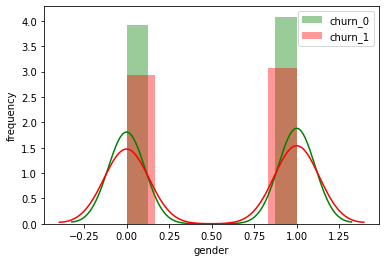

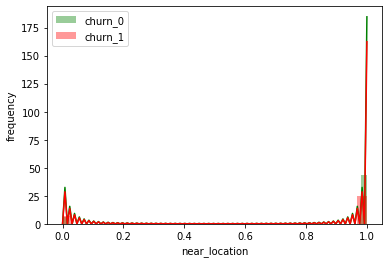

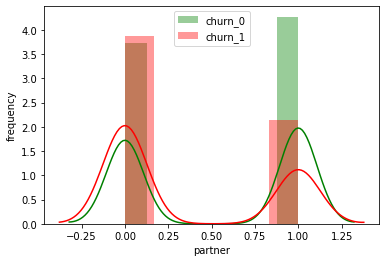

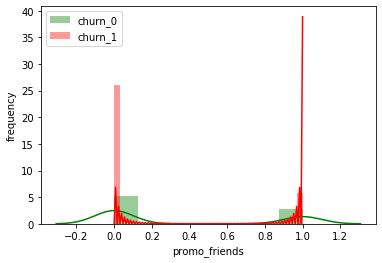

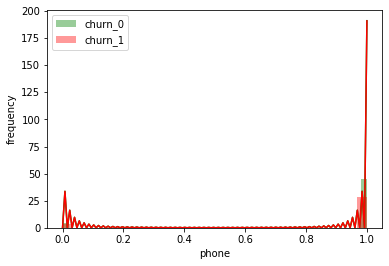

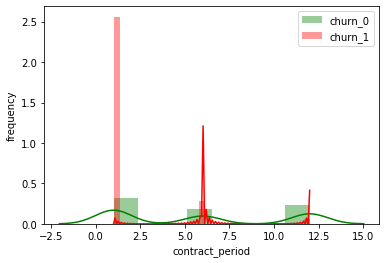

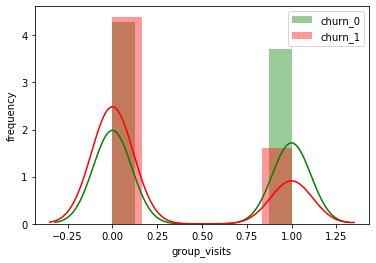

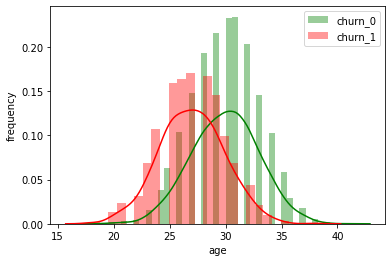

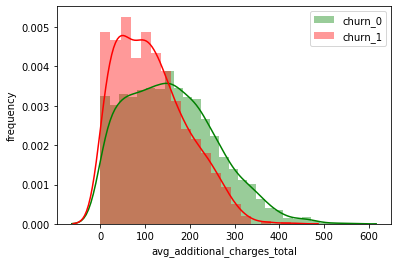

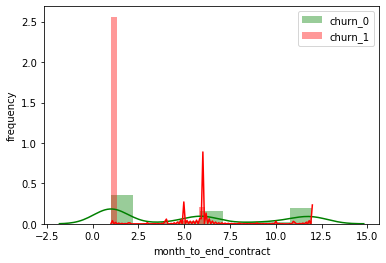

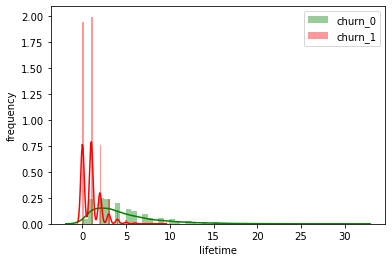

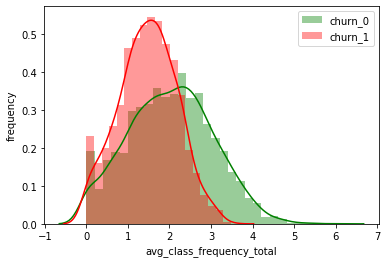

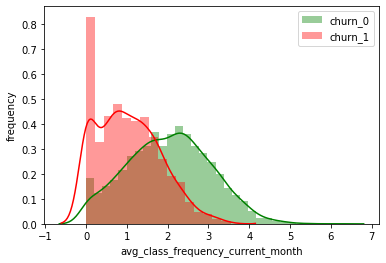

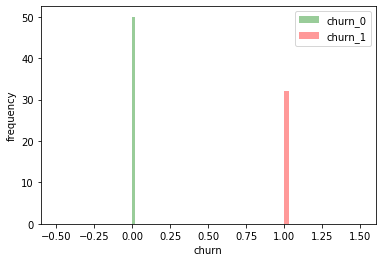

Wall time: 9.19 s


In [11]:
%%time
churn_0 = logs.query('churn == 0')
churn_1 = logs.query('churn == 1')

for i in logs.columns:
    sns.distplot( churn_0[i] , color="green", label="churn_0")
    sns.distplot( churn_1[i] , color="red", label="churn_1")
    plt.ylabel('frequency')
    plt.legend()
    plt.show()


 - **correlation matrix**

In [12]:
# correlation matrix
cm = logs.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


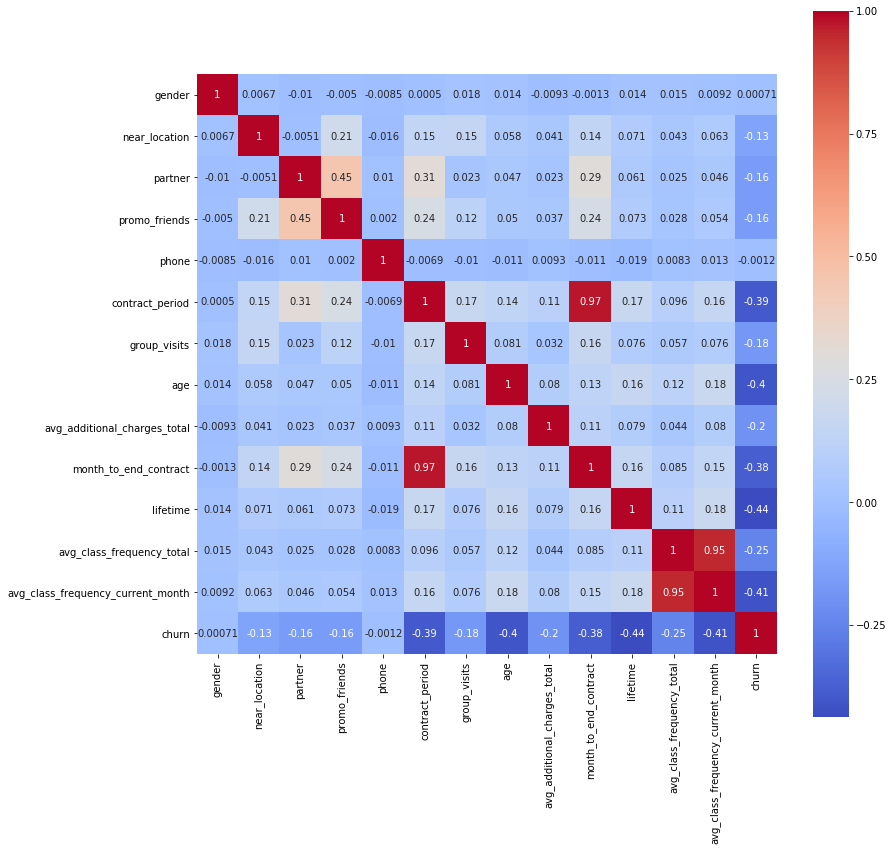

Wall time: 2.07 s


In [13]:
%%time
#build and draw the correlation matrix
fig, ax = plt.subplots(figsize=(13, 13))

#let's draw a heatmap with captions for the correlation matrix
sns.heatmap(cm, annot = True, square=True, cmap='coolwarm') 
plt.show()

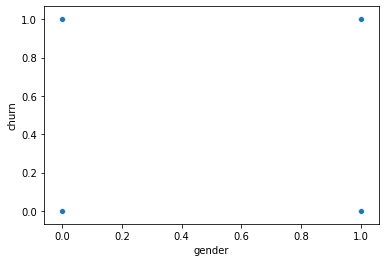

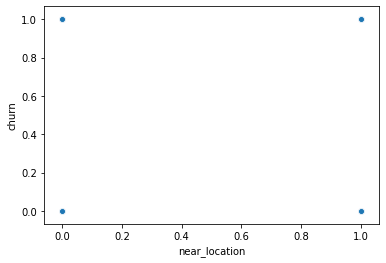

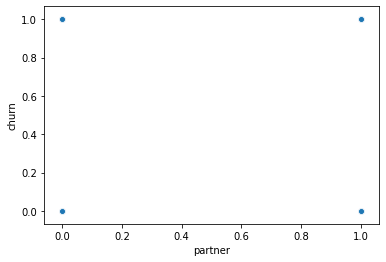

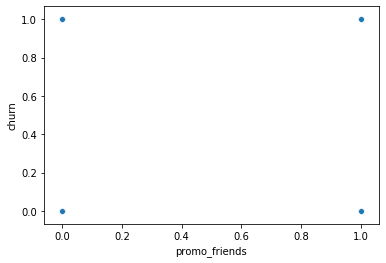

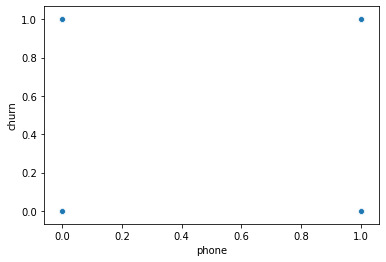

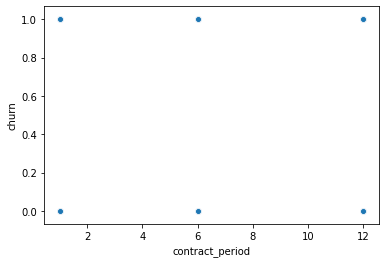

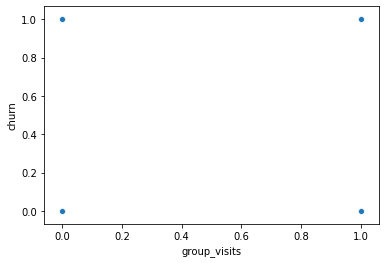

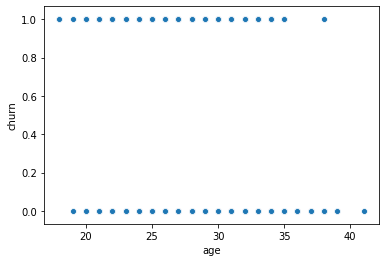

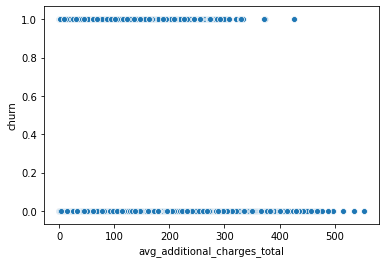

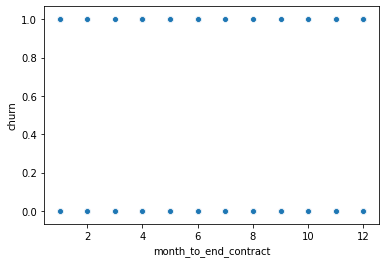

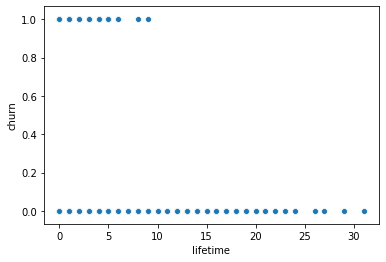

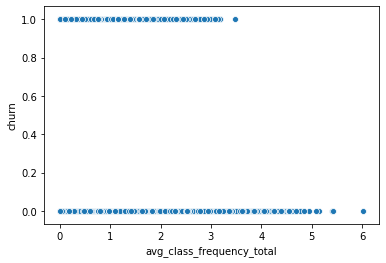

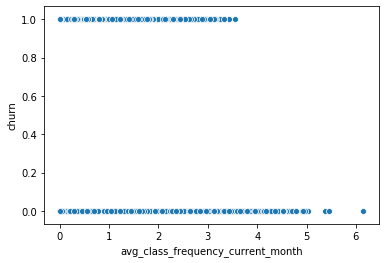

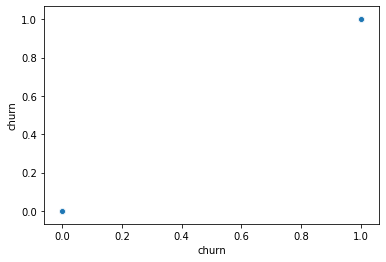

Wall time: 6.44 s


In [14]:
%%time
#build pairwise scatter diagrams feature-target variable churn for each feature
for col in logs.columns:
    sns.scatterplot(logs[col], logs['churn']) 
    plt.show()

# Conclusion: Data Analysis
<a id='Выводы: Анализ данных'></a>

No anomalies were found in the data.
A lot is leaving, about 25% of users. Who leaves:

 - About the same 1 and 0, in terms of gender
 - Most often, those who are farther from the fitness club
 - **Most often those who do not have a partner (as an employer)**
 - **Most often those who do not have friends in the fitness club**
 - **Most often those with a contract less than a year (on average for 1-3 months)**
 - Most often, those who attend little group classes
 - **Most often young return group up to 27 years old**
 - These users use less additional paid services
 - As a rule, they have 1.5 months until the end of the contract. Those. they visit the club for about 1 month, then they quit
 - Go to workout 1 or 2 times a week

There is a strong dependence of the outflow on:
  - Duration of the contract and the remaining period of the contract
  - Average frequency of visits for all time and for the last week.
  - Having a friend or partner, most likely friends from work.

# 6.  Customer churn forecasting model
<a id='Модель прогнозирования оттока клиентов'></a>

In [15]:
# remove multicollinear features for more accurate predictions
logs_drop = logs.drop(['month_to_end_contract', 'promo_friends', 'avg_class_frequency_current_month'], axis = 1)
logs_drop

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,3,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,1,12,0,33,2.406023,8,2.284497,0
3996,0,1,0,1,1,1,29,68.883764,1,1.277168,1
3997,1,1,1,1,12,0,28,78.250542,2,2.786146,0
3998,0,1,1,1,6,0,32,61.912657,3,1.630108,0


In [16]:
# divide our data into features (matrix X) and target variable (y)
X = logs_drop.drop(columns = ['churn'])
y = logs_drop['churn']

In [17]:
# we divide the model into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [18]:
# train StandartScaler on a training set
scaler = StandardScaler()
scaler.fit(X_train)

# Data standardization
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**Logistic regression**

In [19]:
# let's set an algorithm for the logistic regression model
lr_model = LogisticRegression()
# train the model
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# use the already trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [21]:
display(lr_predictions)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [22]:
display(lr_probabilities)

array([3.98541727e-03, 9.57857770e-01, 5.12646187e-01, 7.97991459e-01,
       5.86122962e-02, 6.85120803e-03, 4.39852670e-02, 1.54518718e-03,
       8.42076703e-01, 1.25212642e-02, 3.46644754e-03, 3.11325272e-01,
       1.75125337e-01, 2.15758580e-01, 1.12438359e-02, 6.60384056e-01,
       9.92169102e-02, 2.32149899e-06, 8.51649404e-01, 1.43383608e-01,
       3.55153906e-01, 1.26164884e-03, 2.87495764e-03, 1.86930016e-02,
       5.54951478e-02, 6.57058355e-01, 7.69355236e-02, 9.03488349e-02,
       1.10076115e-01, 2.40481322e-03, 1.00537841e-06, 7.32498961e-02,
       5.39079684e-02, 3.99988556e-01, 1.90086859e-02, 2.07674895e-02,
       7.61583936e-04, 2.79701193e-03, 4.03115679e-04, 1.05185348e-01,
       2.33682170e-03, 9.40334812e-03, 1.29468724e-04, 5.69502915e-04,
       1.49183556e-02, 6.77788759e-01, 1.64497697e-01, 3.05288988e-03,
       9.16820368e-01, 8.94592113e-01, 6.39325620e-01, 1.58585411e-02,
       1.11894757e-02, 1.55300258e-02, 7.68598807e-08, 8.59083703e-01,
      

**Random forest**

In [23]:
# define an algorithm for the random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# train a random forest model
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
# use the already trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [25]:
display(rf_predictions)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [26]:
display(rf_probabilities)

array([0.05, 0.97, 0.24, 0.87, 0.18, 0.  , 0.09, 0.01, 0.88, 0.06, 0.  ,
       0.22, 0.02, 0.07, 0.06, 0.58, 0.11, 0.  , 0.9 , 0.13, 0.17, 0.  ,
       0.01, 0.12, 0.09, 0.43, 0.11, 0.04, 0.2 , 0.04, 0.03, 0.02, 0.19,
       0.56, 0.09, 0.04, 0.03, 0.01, 0.04, 0.2 , 0.01, 0.02, 0.  , 0.  ,
       0.05, 0.69, 0.07, 0.05, 0.96, 0.98, 0.48, 0.01, 0.05, 0.18, 0.1 ,
       0.66, 0.05, 0.35, 0.9 , 0.01, 0.94, 0.93, 0.03, 0.49, 0.  , 0.02,
       0.04, 0.01, 0.1 , 0.05, 0.02, 0.01, 0.05, 0.03, 0.01, 0.02, 0.89,
       0.38, 0.94, 0.02, 0.51, 0.03, 0.01, 0.1 , 0.03, 0.83, 0.95, 0.13,
       0.04, 0.03, 0.03, 0.  , 0.66, 0.05, 0.  , 0.03, 0.16, 0.03, 0.01,
       0.75, 0.18, 0.48, 0.99, 0.2 , 0.07, 0.  , 0.  , 0.39, 0.94, 0.02,
       0.03, 0.05, 0.94, 0.42, 0.54, 0.03, 0.04, 0.78, 0.  , 0.05, 0.  ,
       0.01, 0.  , 0.79, 0.93, 0.02, 0.06, 0.  , 0.94, 0.01, 0.72, 0.1 ,
       0.74, 0.01, 0.  , 0.31, 0.07, 0.37, 0.95, 0.51, 0.82, 0.97, 0.03,
       0.63, 0.  , 0.68, 0.69, 0.98, 0.22, 0.4 , 0.

In [27]:
# define a function that will display our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [28]:
# display all metrics of logistic regression
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for the logistic regression model:')

Metrics for the logistic regression model:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81


In [29]:
# display all the metrics of a random forest
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for the random forest model:')

Metrics for the random forest model:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.80


#  Conclusion: customer churn forecasting model
<a id='Выводы: Модель прогнозирования оттока клиентов'></a>

The `Accuracy` (percentage of correct answers) is the same for the Logistic Regression model and the Random Forest model.
There is a difference in the `Precision` and` Recall` metrics. What's more important?
The `precision` metric is needed if each hit of the model - the fact that it is classified as a class" 1 "- costs resources.
The `recall` metric shows how many real objects of" 1 "class we were able to detect using the model.

If the `precision` metric is triggered more often, it will cost us nothing, and if the` recall` metric is triggered more often, it means we will be able to call the client again and clarify whether everything is fine. For us, `recall` has more weight, therefore, we will take the Logistic regression model as the basic model for predicting customer churn. Its use in production is recommended.

# 7. Client clusterization
<a id='Кластеризацию клиентов'></a>

**Dendrogram**

In [30]:
# standardize data
sc = StandardScaler()
x_sc = sc.fit_transform(logs_drop)
linked = linkage(x_sc, method = 'ward')

In [31]:
print(x_sc) 

[[ 0.97970588  0.42788074  1.02686062 ... -0.19332863 -1.91191971
  -0.6008387 ]
 [-1.0207145   0.42788074 -0.973842   ...  0.87368001  0.04517569
  -0.6008387 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.46008079 -0.02049263
  -0.6008387 ]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.46008079  0.93313947
  -0.6008387 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.19332863 -0.25604937
  -0.6008387 ]
 [ 0.97970588 -2.33709981  1.02686062 ... -0.72683295 -0.79947418
  -0.6008387 ]]


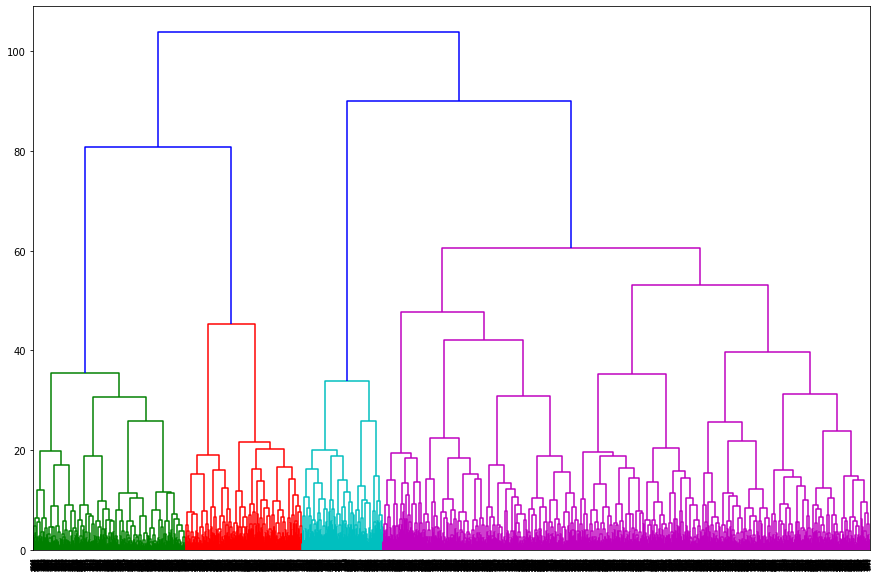

Wall time: 3min 22s


In [32]:
%%time
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

The suggested optimal number of clusters is 4 - four different colors on the graph.

**K-Means Algorithm**

In [33]:
km = KMeans(n_clusters = 5) # set the number of clusters equal to 5 according to the given condition
labels = km.fit_predict(x_sc) # apply the algorithm to the data and form a vector of clusters 

In [34]:
# save the cluster labels in the field of our dataset
logs_drop['cluster_km'] = labels
display(logs_drop.head())

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,0,6,1,29,14.227470,3,0.020398,0,3
1,0,1,0,1,12,1,31,113.202938,7,1.922936,0,0
2,0,1,1,1,1,0,28,129.448479,2,1.859098,0,0
3,0,1,1,1,12,1,33,62.669863,2,3.205633,0,0
4,1,1,1,1,1,0,26,198.362265,3,1.113884,0,1


In [35]:
# we display statistics on the average values of our features for the cluster
logs_drop.groupby(['cluster_km']).mean()

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,
0,0.000000,0.891566,0.867470,1.0,7.700000,0.473494,29.912048,162.240055,4.618072,2.045953,0.006024
1,1.000000,0.851748,1.000000,1.0,7.053147,0.451748,29.976224,154.066155,4.709091,2.001653,0.005594
2,0.512067,0.758657,0.346275,1.0,1.651626,0.258132,26.889822,115.531654,0.989507,1.455597,0.993704
3,0.523316,0.862694,0.471503,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839
4,0.569892,0.874552,0.000000,1.0,3.470430,0.467742,30.055556,158.774500,4.690860,2.046458,0.001792


In [36]:
# define the function for drawing graphs of pairwise features for clusters
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(df[x_name], df[y_name], hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

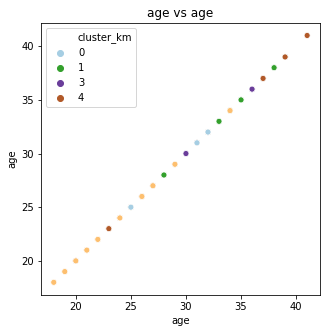

In [37]:
# draw graphs for a pair of features
show_clusters_on_plot(logs_drop, 'age', 'age', 'cluster_km') 

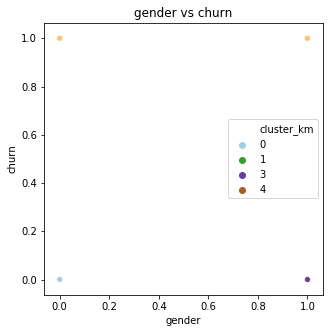

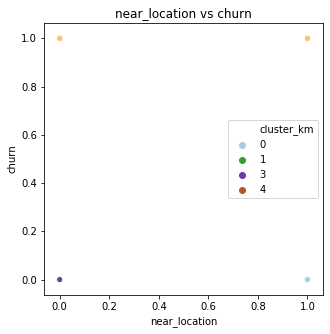

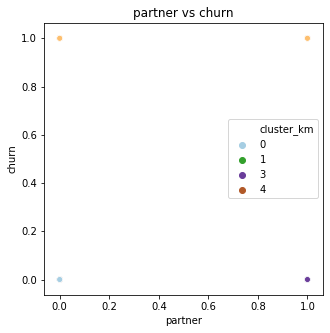

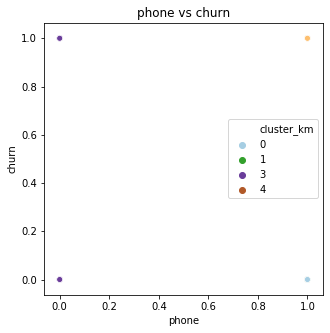

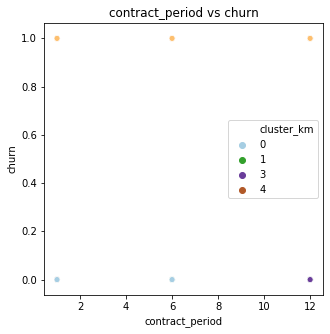

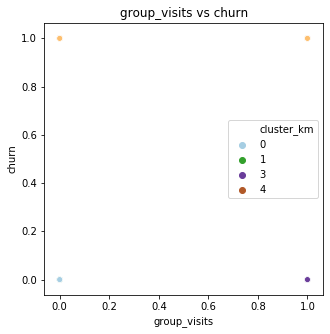

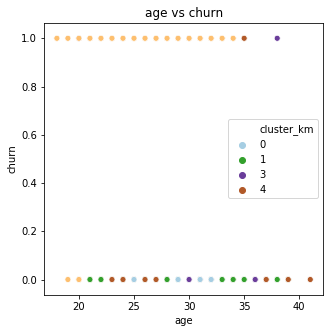

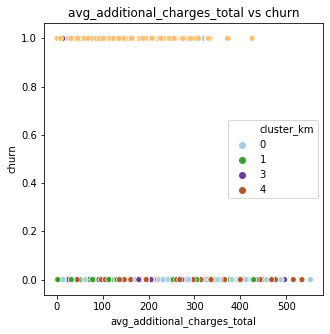

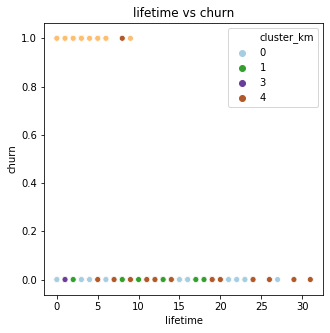

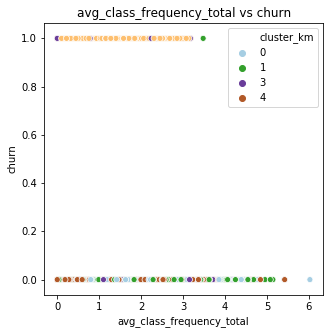

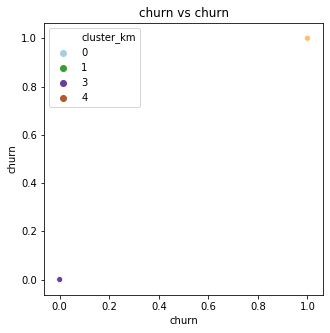

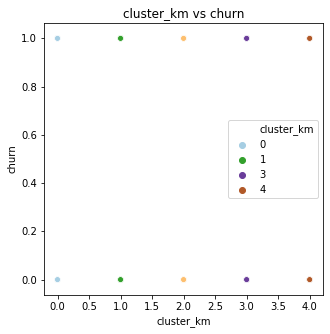

In [38]:
#build pairwise scatter diagrams feature-target variable churn for each feature
for col in logs_drop.columns:
    show_clusters_on_plot(logs_drop, col, 'churn', 'cluster_km')  

# Conclusion: client clusterization
<a id='Выводы: Кластеризацию клиентов'></a>

With the help of a dendrogram, 4 clusters were obtained.

Using the K-means algorithm, 5 user clusters were identified according to the task.
The safest clusters are 1 and 2. Typical patterns:
  - age is about 30 years, lifetime is approaching 5 months, lives close, the duration of the contract is different (1-3 months and 6-12 months). Acquires add. services, walks stably 2 workouts per week.
 
The most "dangerous" clusters in descending order 3,0,4. Typical patterns:
 - 3- age about 27 years old, lifetime about 1 month, lives close, most likely without a partner's company, the duration of the contract is 1.2 or 3 months. I came to try. Acquires at least additional services, goes to workouts 1 and 2, alternating every other week.
 - 0- age about 29 years old, lifetime 3 months, lives far away, the duration of the contract is 3 months. Acquires several add-ons. services, trying to approach the indicator of 2 workouts per week.
 - 4- age is about 29 years old, lifetime is 4 months, lives in most cases close, the duration of the contract is from 3 to 6 months. Acquires several add-ons. services, trying to approach the indicator of 2 workouts per week.


# 8. Conclusions of the project
<a id='Выводы по проекту'></a>

**General conclusions**

DF `logs` has no duplicates, all values are unique, there are no gaps in the data.

Columns are casted to lowercase.

The columns have the correct data type.

No anomalies were found in the data.
A lot is leaving, about 25% of users. Who leaves:

 - Approximately the same 1 and 0, with tz gender
 - Most often, those who are farther from the fitness club
 - **Most often those who do not have a partner (as an employer)**
 - **Most often those who do not have friends in the fitness club**
 - **Most often those with a contract less than a year (on average for 1-3 months)**
 - Most often, those who attend little group classes
 - **Most often young return group up to 27 years old**
 - These users use less additional paid services
 - As a rule, they have 1.5 months until the end of the contract. Those. they visit the club for about 1 month, then they quit
 - Go to workout 1 or 2 times a week

There is a strong dependence of the outflow on:
  - Duration of the contract and the remaining period of the contract
  - Average frequency of visits for all time and for the last week.
  - Having a friend or partner, most likely friends from work.

The `Accuracy` (percentage of correct answers) is the same for the Logistic Regression model and the Random Forest model.
There is a difference in the `Precision` and` Recall` metrics. What's more important?
The `precision` metric is needed if each hit of the model - the fact that it is classified as a class" 1 "- costs resources.
The `recall` metric shows how many real objects of" 1 "class we were able to detect using the model.

If the `precision` metric is triggered more often, it will cost us nothing, and if the` recall` metric is triggered more often, it means we will be able to call the client again and clarify whether everything is fine. For us, `recall` has more weight, therefore, we will take the Logistic regression model as the basic model for predicting customer churn. Its use in production is recommended.

With the help of a dendrogram, 4 clusters were obtained.

Using the K-means algorithm, 5 user clusters were identified according to the task.
The safest clusters are 1 and 2. Typical patterns:
  - age is about 30 years, lifetime is approaching 5 months, lives close, the duration of the contract is different (1-3 months and 6-12 months). Acquires add. services, walks stably 2 workouts per week.
 
The most "dangerous" clusters in descending order 3,0,4. Typical patterns:
 - 3- age about 27 years old, lifetime about 1 month, lives close, most likely without a partner's company, the duration of the contract is 1.2 or 3 months. I came to try. Acquires at least additional services, goes to workouts 1 and 2, alternating every other week.
 - 0- age about 29 years old, lifetime 3 months, lives far away, the duration of the contract is 3 months. Acquires several add-ons. services, trying to approach the indicator of 2 workouts per week.
 - 4- age is about 29 years old, lifetime is 4 months, lives in most cases close, the duration of the contract is from 3 to 6 months. Acquires several add-ons. services, trying to approach the indicator of 2 workouts per week.

**Recommendations**

Strongly affect churn:

1. age - young people leave. It is recommended to develop trendy fashion directions for young people.
    
2. number of workouts per week - a client with an unstable schedule is likely to leave the fitness club. It is required to search for clients through partner-employers, develop a refer-a-friend program and get a discount, increase personal training to increase stability.
    
3. duration of the contract - if the contract is less than 1-3 months, then the client is most likely a "stray", came to try. Longer contracts will keep clients. This requires a good marketing program with a flexible discount system.
    
4. Proximity of location - it is necessary to pay more attention to clients who live nearby. Long-distance clients are likely to "fall off", no one wants to waste time on the road and traffic jams.
